In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import sys
LOCAL_FAST_AI = '/Users/krishnakalyan3/Educational/FastAI/fastai/'
AWS_FAST_AI = '/home/ubuntu/fastai'
sys.path.append(LOCAL_FAST_AI)

In [6]:
from fastai.imports import *

In [7]:
from glob import iglob
import pprint 

In [8]:
PATH = '/Users/krishnakalyan3/Educational/Plant/data/'

# Split Data

In [9]:
df = pd.DataFrame(columns=["file", "species"])

In [10]:
for image in glob(PATH + "train/**/*.png"):
    dir_ = image.split('/')
    file_, species = dir_[-1], dir_[-2]

    df = df.append({
        "file": file_,
        "species": species.replace(" ", "_")
        }, ignore_index=True)

df.to_csv(PATH + 'labels.csv', index=False)

In [20]:
# mv train/**/*.png train
# rm -r train/**/

# Build Model

In [11]:
from fastai.transforms import * 
from fastai.conv_learner import * 
from fastai.model import *
from fastai.dataset import * 
from fastai.sgdr import *
from fastai.plots import *
from fastai.models.nasnet import nasnetalarge

In [12]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n, val_pct=.02)
n

24

In [13]:
f_model = resnext50
sz=250
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)

In [17]:
data = ImageClassifierData.from_csv(PATH, folder='train', csv_fname=f'{PATH}labels.csv',
                                    tfms=tfms, val_idxs=[0], test_name='test', bs=12)
learn = ConvLearner.pretrained(f_model, data, precompute=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/krishnakalyan3/Educational/FastAI/fastai/fastai/weights/resnext_50_32x4d.pth'

In [10]:
learn.fit(0.01, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       1.07731  0.58717  0.80019]                        



HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 71%|███████▏  | 277/388 [00:02<00:00, 133.70it/s, loss=2.97] 


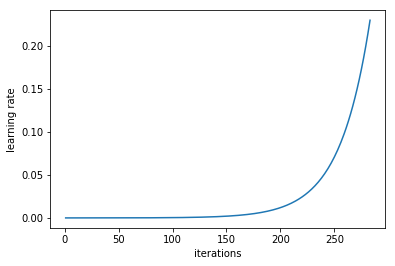

In [11]:
lrf=learn.lr_find()
learn.sched.plot_lr()

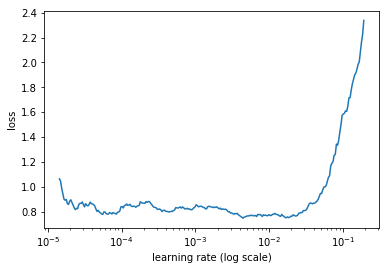

In [12]:
learn.sched.plot()

In [13]:
learn.precompute=False

In [14]:
learn.fit(0.002, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.80471  0.3303   0.88447]                        
[ 1.       0.7222   0.3488   0.86364]                        
[ 2.       0.73006  0.2853   0.88447]                        



In [15]:
lr = 1e-2
learn.unfreeze()
lr=np.array([lr/18,lr/6,lr/2])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.44     0.1419   0.92614]                        
[ 1.       0.30856  0.1718   0.91477]                        
[ 2.       0.20274  0.12049  0.94602]                        
[ 3.       0.24551  0.12233  0.95644]                        
[ 4.       0.22819  0.04555  0.98958]                        
[ 5.       0.12993  0.0465   0.98958]                         
[ 6.       0.11992  0.03878  0.98958]                         



In [16]:
learn.fit(lr, 3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

[ 0.       0.17108  0.0632   0.98958]                        
[ 1.       0.0833   0.04771  1.     ]                         
[ 2.       0.16589  0.05924  0.95833]                        
[ 3.       0.13543  0.0443   0.97917]                         
[ 4.       0.05764  0.02737  0.98958]                         
[ 5.       0.04917  0.029    0.98958]                         
[ 6.       0.09845  0.11536  0.94792]                         
[ 7.       0.1011   0.08302  0.95833]                         
[ 8.       0.08765  0.03458  0.97917]                         
[ 9.       0.08329  0.01203  1.     ]                         
[ 10.        0.0461    0.02056   1.     ]                     
[ 12.        0.03473   0.01089   1.     ]                     
[ 13.        0.03332   0.01433   1.     ]                     



In [17]:
learn.fit(lr, 3, cycle_len=2, cycle_mult=4)

HBox(children=(IntProgress(value=0, description='Epoch', max=42), HTML(value='')))

[ 0.       0.06633  0.0244   1.     ]                         
[ 1.       0.03906  0.01622  1.     ]                         
[ 2.       0.0855   0.03472  0.97917]                         
 84%|████████▍ | 326/388 [02:59<00:34,  1.82it/s, loss=0.0614]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ 10.        0.07318   0.05147   0.98958]                     
[ 11.        0.06475   0.02054   0.98958]                     
[ 12.        0.04693   0.02938   0.98958]                     
[ 13.        0.04727   0.04499   0.98958]                     
 32%|███▏      | 126/388 [01:11<02:28,  1.76it/s, loss=0.0411]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ 20.       0.0161   0.0135   1.    ]                         
[ 21.        0.02331   0.02884   0.97917]                     
[ 22.        0.01732   0.0146    0.98958]                      
[ 23.        0.01503   0.01404   1.     ]                      
 69%|██████▊   | 266/388 [02:25<01:06,  1.83it/s, loss=0.00605]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ 31.        0.00309   0.02658   0.98958]                      
[ 32.        0.00939   0.01434   0.98958]                      
[ 33.       0.0042   0.0052   1.    ]                          
[ 34.        0.00222   0.01355   0.98958]                      
 14%|█▍        | 56/388 [00:32<03:12,  1.72it/s, loss=0.00827]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ 41.        0.00694   0.01141   0.98958]                      



In [18]:
learn.save(f'resnext_50_{sz}')

In [25]:
learn.load(f'resnext_50_250')

# Vailidation

In [32]:
log_preds,y = learn.TTA()

In [33]:
preds = np.argmax(log_preds, axis=0)
yhat = np.argmax(preds, axis=1)

In [34]:
def metrics(y, yhat):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    cm = confusion_matrix(y, yhat)
    f1 = f1_score(y, yhat, average='macro')
    acc = accuracy_score(y, yhat)

    # plt.matshow(cm)
    return f1, acc, cm

In [35]:
f,a,c = metrics(y, yhat)
f,a, c

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.2132161793081333,
 0.22105263157894736,
 array([[4, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
        [3, 3, 2, 3, 1, 1, 2, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [4, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0],
        [2, 4, 1, 1, 1, 2, 3, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0],
        [2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
        [1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2]]))

In [71]:
log_preds_test = learn.predict(is_test=True)
log_preds_test.shape

(794, 12)

In [72]:
log_preds_test = np.argmax(log_preds_test, axis=1)

In [55]:
learn.save(f'resnext_50_{sz}')

In [47]:
log_preds_test = learn.predict(is_test=True)
log_preds_test = np.argmax(log_preds_test, axis=1)
probs_1 = np.exp(log_preds_test)

# Old pretrained model

In [50]:
arch = resnet50
learn2 = ConvLearner.pretrained(arch, data) 

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ubuntu/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 68302114.65it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 70%|██████▉   | 270/388 [02:26<01:04,  1.84it/s, loss=2.78] 

In [53]:
log_preds_test = learn.predict(is_test=True)
log_preds_test = np.argmax(log_preds_test, axis=1)

In [ ]:
probs_1 = np.exp(log_preds_test)

In [44]:
preds_classes = [data.classes[i].replace("_", " ") for i in log_preds_test]

In [40]:
submission = pd.DataFrame({'file': os.listdir(f'{PATH}test'), 'species': preds_classes})
submission.to_csv(PATH + 'submission_2.csv', index=False)

In [54]:
submission

,file,species
0,12625488b.png,Fat Hen
1,c832e4302.png,Fat Hen
2,e82017baa.png,Loose Silky-bent
3,c10ccbd82.png,Scentless Mayweed
4,8b27bfd2b.png,Small-flowered Cranesbill
5,13b9fa92d.png,Sugar beet
6,d6d80a321.png,Scentless Mayweed
7,56a01b835.png,Cleavers
8,2b55a2da2.png,Charlock
9,ce3d280eb.png,Common Chickweed


In [ ]:
submission